In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('D:/Quera/second project/data.csv')

In [6]:
data.describe()

Unnamed: 0    Announced       Weight  Display Size          ppi  \
count  2651.000000  2651.000000  2651.000000   2651.000000  2651.000000   
mean   2495.184081  2016.577518   190.389325      5.759838   312.312335   
std    1290.683411     3.656827    97.208564      1.628346   101.907171   
min       0.000000  2010.000000    89.300000      2.200000   121.000000   
25%    1450.000000  2014.000000   140.100000      4.700000   233.000000   
50%    2455.000000  2016.000000   167.000000      5.500000   288.000000   
75%    3681.000000  2020.000000   195.000000      6.530000   400.000000   
max    4678.000000  2024.000000   950.000000     14.600000   807.000000   

        body ratio  battery_capacity        Price          CPU         pixel  \
count  2651.000000       2651.000000  2651.000000  2372.000000  2.651000e+03   
mean     71.775556       3385.437948   242.896775     5.847808  1.576779e+06   
std      11.262514       1627.512406   193.726059     2.372880  1.181280e+06   
min      25.500000         50.000000    20.000000     2.000000  7.680000e+04   
25%      64.650000       2070.000000   130.000000     4.000000  5.184000e+05   
50%      71.400000       3000.000000   190.000000     8.000000  1.094400e+06   
75%      81.800000       4500.000000   290.000000     8.000000  2.527200e+06   
max      94.100000      11560.000000  2000.000000    10.000000  8.294400e+06   

               RAM      Storage  
count  2651.000000  2651.000000  
mean      2.901974    46.621613  
std       2.493559    60.823522  
min       0.062500     0.039062  
25%       1.000000     8.000000  
50%       2.000000    16.000000  
75%       4.000000    64.000000  
max      16.000000   512.000000

## سوال اول بخش اول

In [7]:
#K-means clustering algorithm according to two features of battery capacity and price with 5 clusters
battery_capacity = data.battery_capacity
Price = data.Price
df=pd.DataFrame({'x': battery_capacity, 'y': Price})
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

In [8]:
kmeans.cluster_centers_

array([[3318.61976369,  249.38627282],
       [6647.26984127,  321.60912698],
       [1825.89217759,  161.29894292],
       [4790.68280467,  318.16223706],
       [9197.79591837,  572.44897959]])

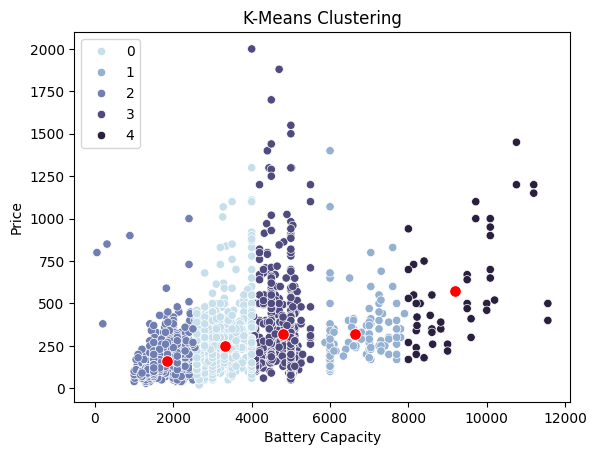

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(np.column_stack((battery_capacity, Price)))

sns.scatterplot(x=battery_capacity, y=Price, hue=kmeans.labels_, palette="ch:s=.25,rot=-.25")

Cs = kmeans.cluster_centers_
for i in range(len(Cs)):
    sns.scatterplot(x=[Cs[i, 0]], y=[Cs[i, 1]] , color='red' , s=70)

plt.title('K-Means Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()


## سوال اول بخش دوم

In [10]:
#K-means algorithm to choose k from 1 to 10 by Within-Cluster Sum of Square
data = pd.read_csv('D:/Quera/second project/data.csv')
battery_capacity = data.battery_capacity
Price = data.Price
df=pd.DataFrame({'x': battery_capacity, 'y': Price})

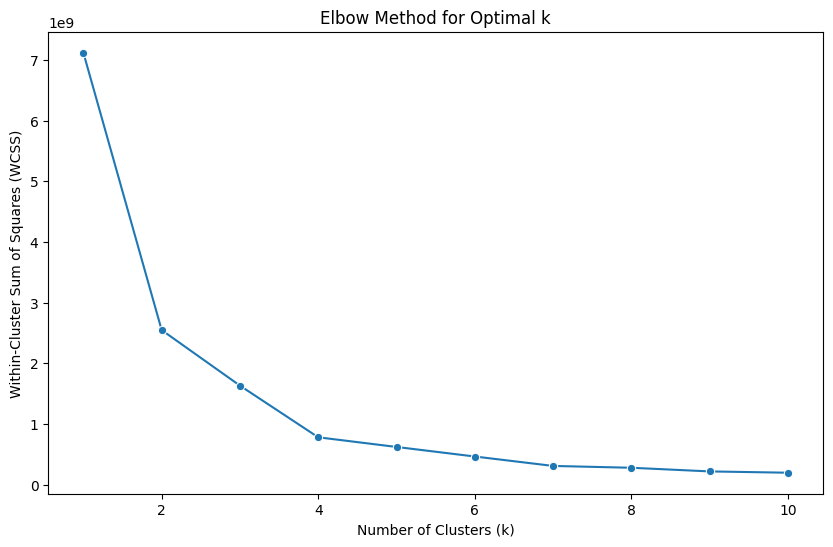

In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


طبق این روش به ترتیب تعداد ۲ و ۴ خوشه مناسب هستند

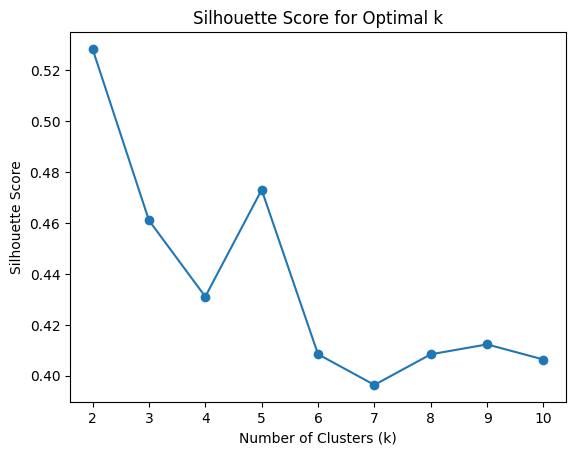

In [12]:
#Standard Scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
cluster_range = range(2, 11)

#Silhouette Score method
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


طبق این روش به ترتیب تعداد ۲ و ۵  خوشه مناسب هستند

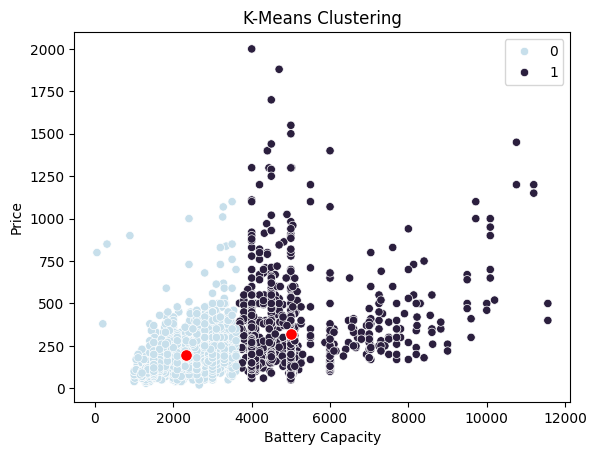

In [13]:
#Check k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(np.column_stack((battery_capacity, Price)))

sns.scatterplot(x=battery_capacity, y=Price, hue=kmeans.labels_, palette="ch:s=.25,rot=-.25")
Cs = kmeans.cluster_centers_
for i in range(len(Cs)):
    sns.scatterplot(x=[Cs[i, 0]], y=[Cs[i, 1]] , color='red' , s=70)

plt.title('K-Means Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

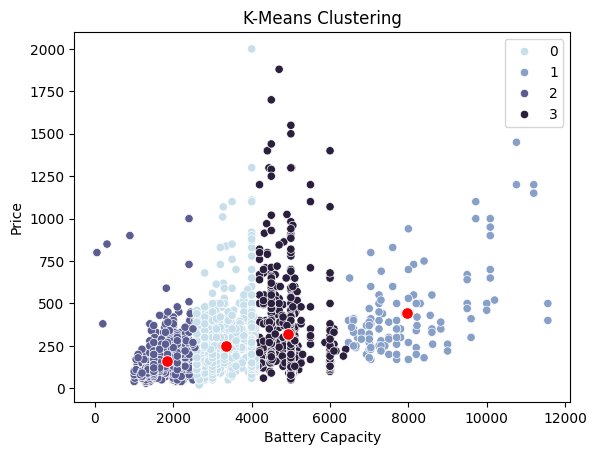

In [14]:
#Check k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(np.column_stack((battery_capacity, Price)))

sns.scatterplot(x=battery_capacity, y=Price, hue=kmeans.labels_, palette="ch:s=.25,rot=-.25")
Cs = kmeans.cluster_centers_
for i in range(len(Cs)):
    sns.scatterplot(x=[Cs[i, 0]], y=[Cs[i, 1]] , color='red' , s=70)

plt.title('K-Means Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
#gap statistic method
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def calculate_gap_statistic(df, k_max=10, n_refs=5):
    gaps = np.zeros((k_max-1,))

    for k in range(1, k_max):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        cluster_assignments = kmeans.predict(df)
        dispersion = np.sum(cdist(df, kmeans.cluster_centers_, 'euclidean')**2) / (2 * k)

        reference_dispersions = np.zeros((n_refs,))

        for i in range(n_refs):
            reference_data = np.random.rand(*data.shape)
            reference_kmeans = KMeans(n_clusters=k, random_state=42)
            reference_kmeans.fit(reference_data)
            reference_dispersions[i] = np.sum(cdist(reference_data, reference_kmeans.cluster_centers_, 'euclidean')**2) / (2 * k)

        gaps[k-1] = np.mean(np.log(reference_dispersions) - np.log(dispersion))

    return gaps

gap_values = calculate_gap_statistic(df)

plt.plot(range(1, len(gap_values)+1), gap_values, marker='o')
plt.title('Gap Statistics for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Value')
plt.show()


طبق این روش به ترتیب تعداد ۵ و ۹ خوشه مناسب هستند.

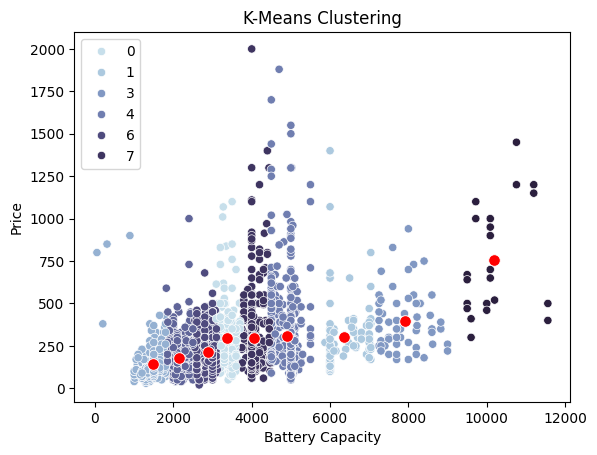

In [43]:
#Check k=9
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(np.column_stack((battery_capacity, Price)))

sns.scatterplot(x=battery_capacity, y=Price, hue=kmeans.labels_, palette="ch:s=.25,rot=-.25")
Cs = kmeans.cluster_centers_
for i in range(len(Cs)):
    sns.scatterplot(x=[Cs[i, 0]], y=[Cs[i, 1]] , color='red' , s=70)

plt.title('K-Means Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

با توجه به مجموع نتایج به دست آمده با الگوریتم های فوق، به نظر می‌رسد بهترین مقدار برای خوشه برابر ۵ باشد.

## سوال اول بخش سوم

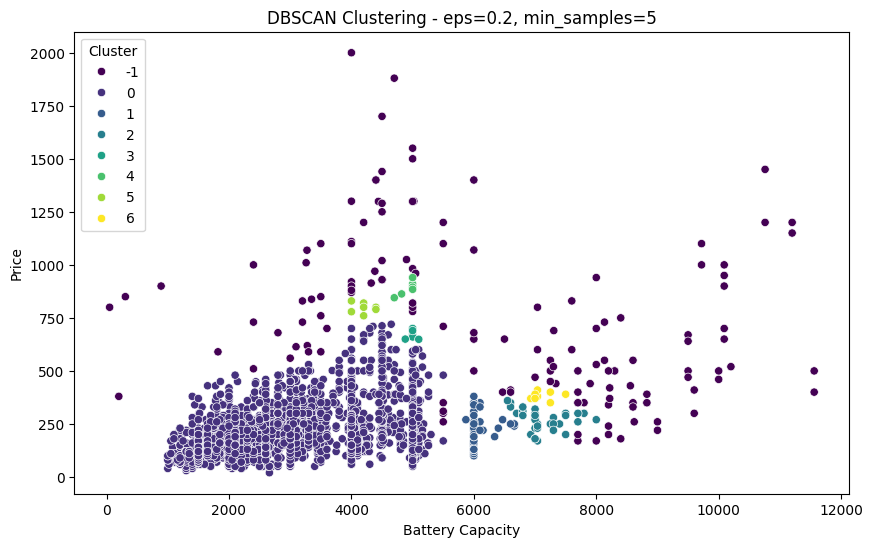

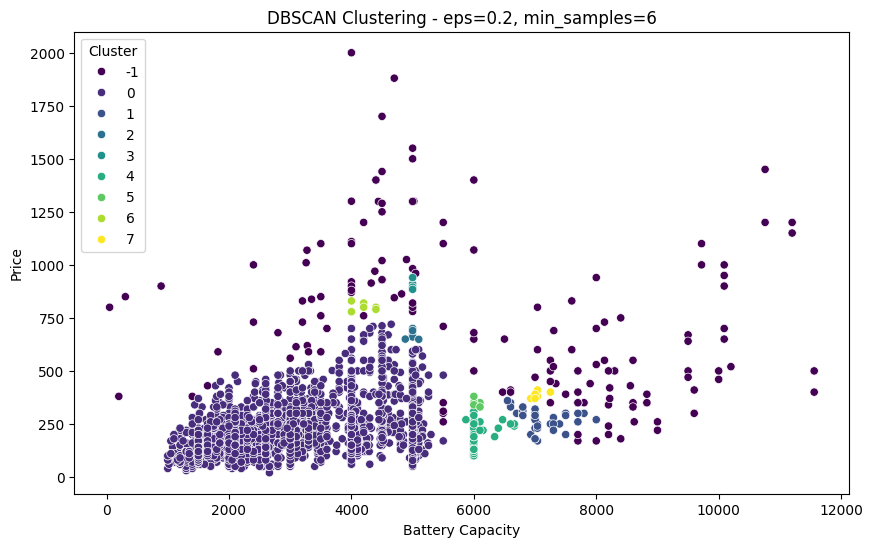

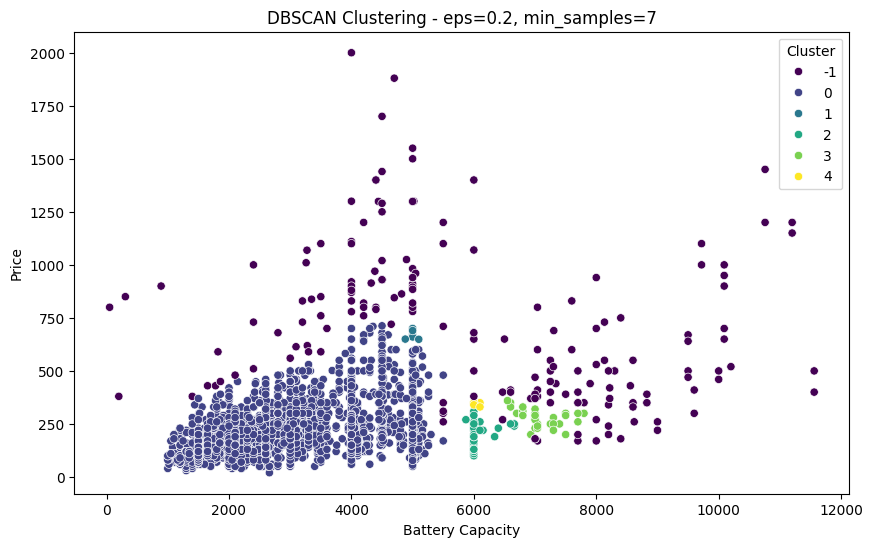

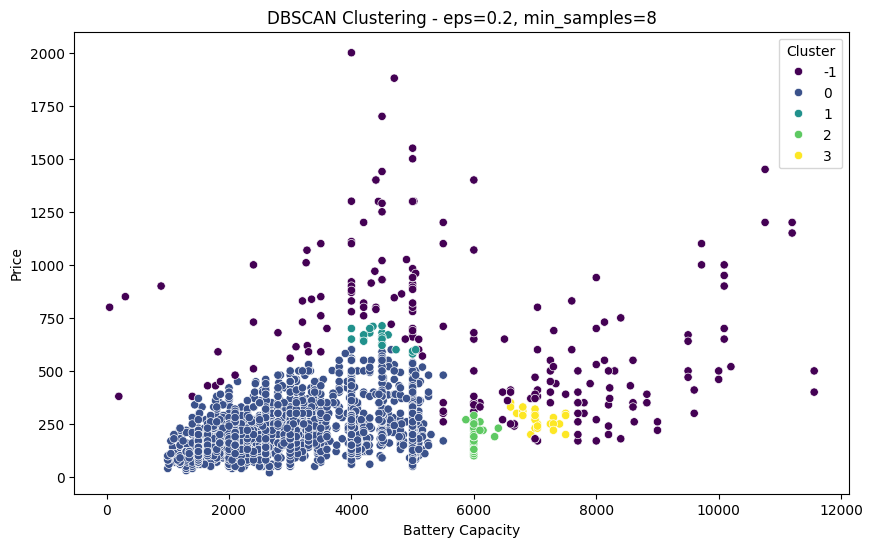

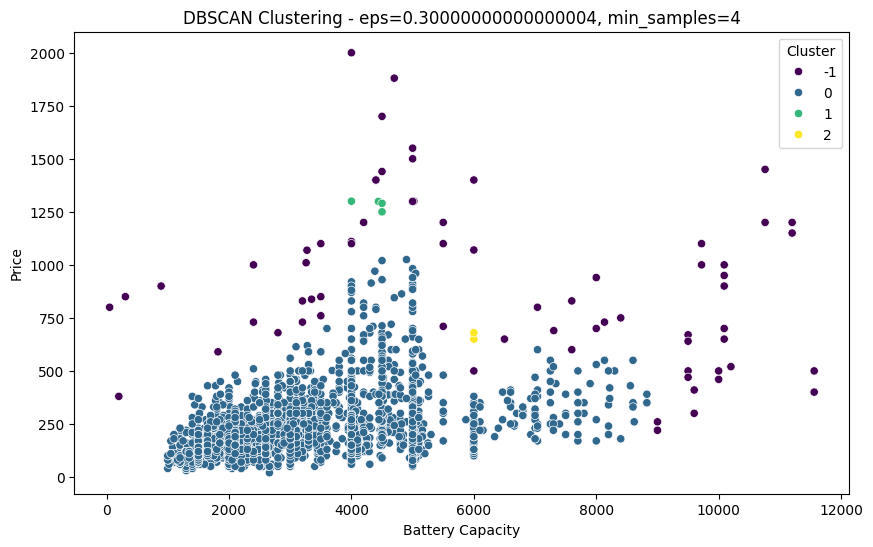

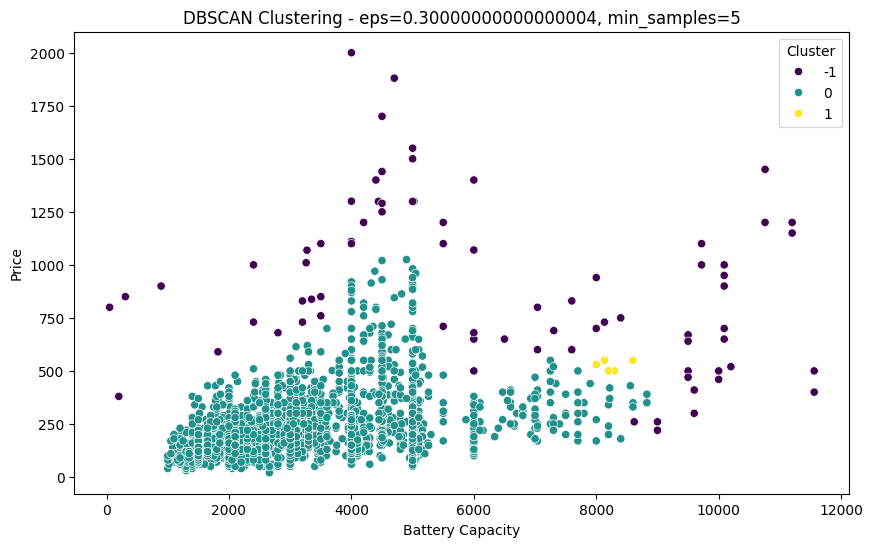

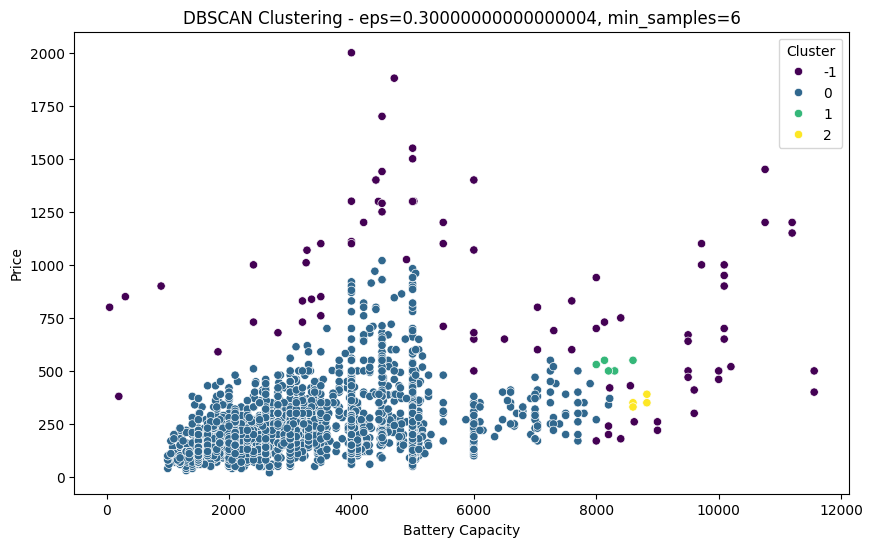

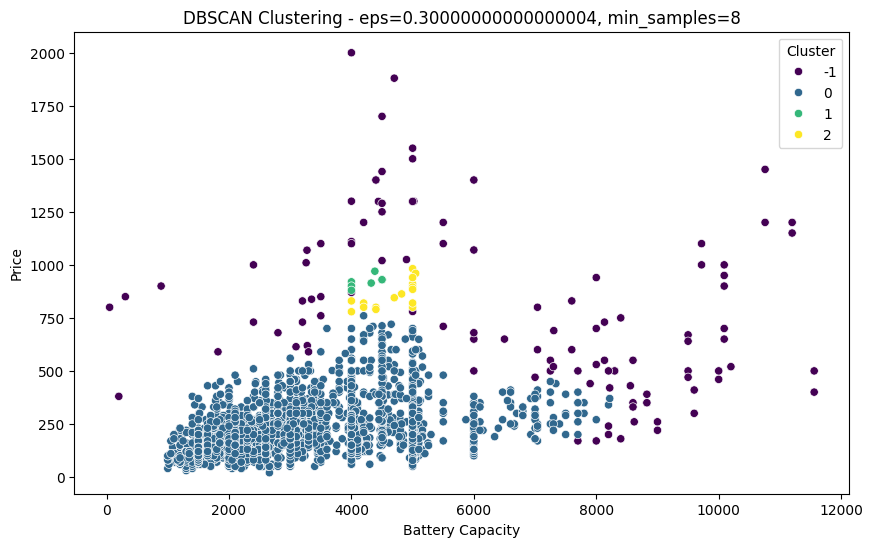

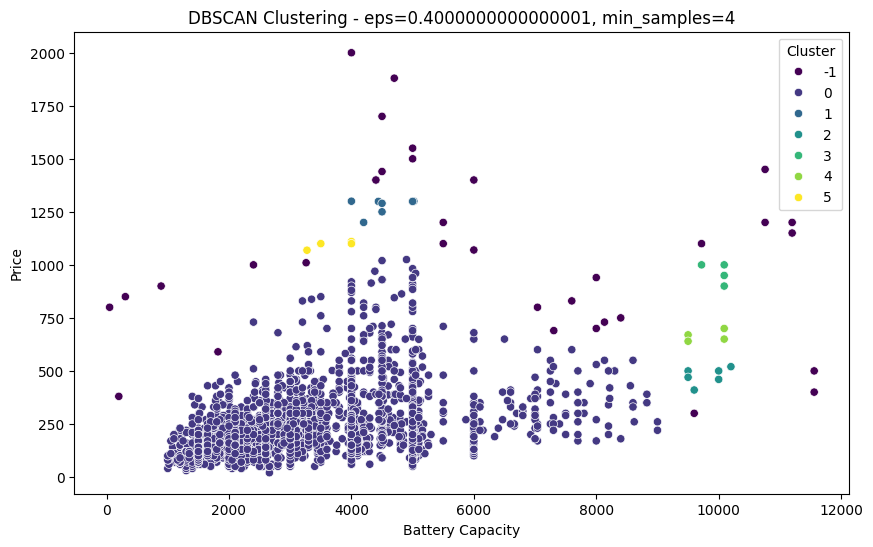

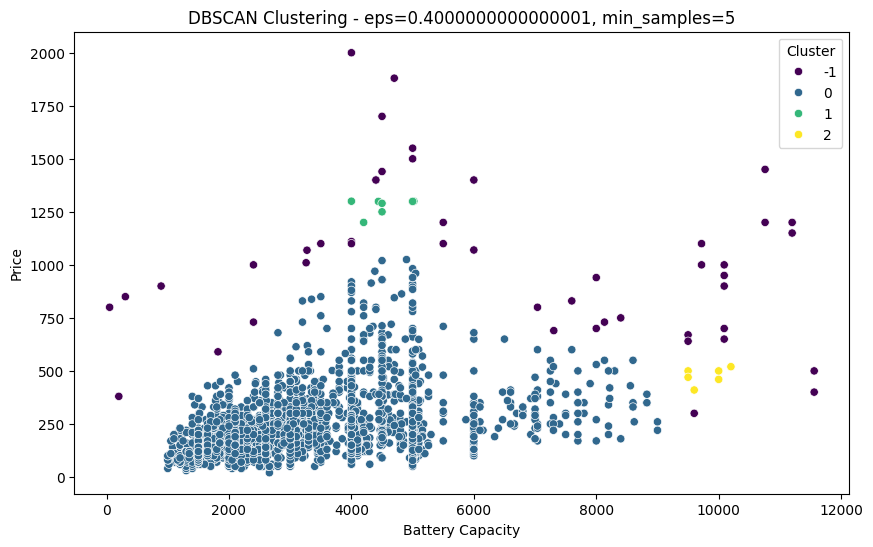

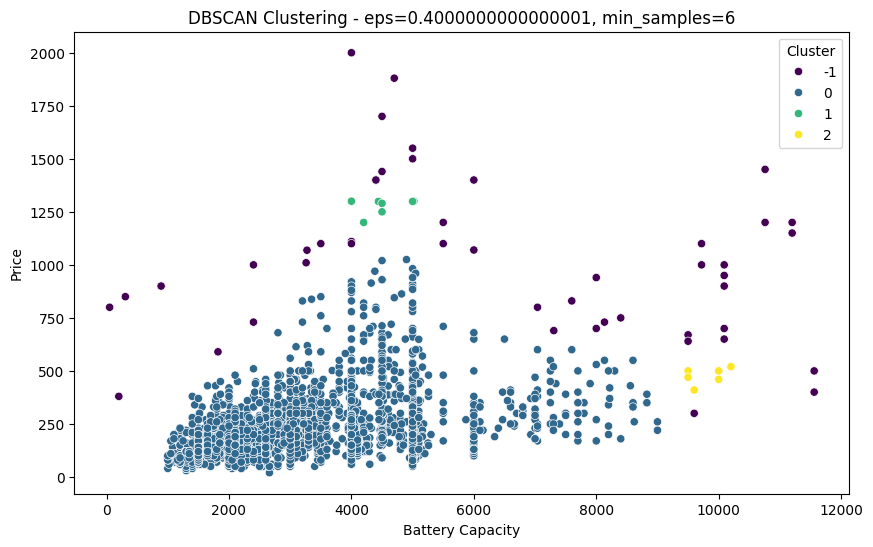

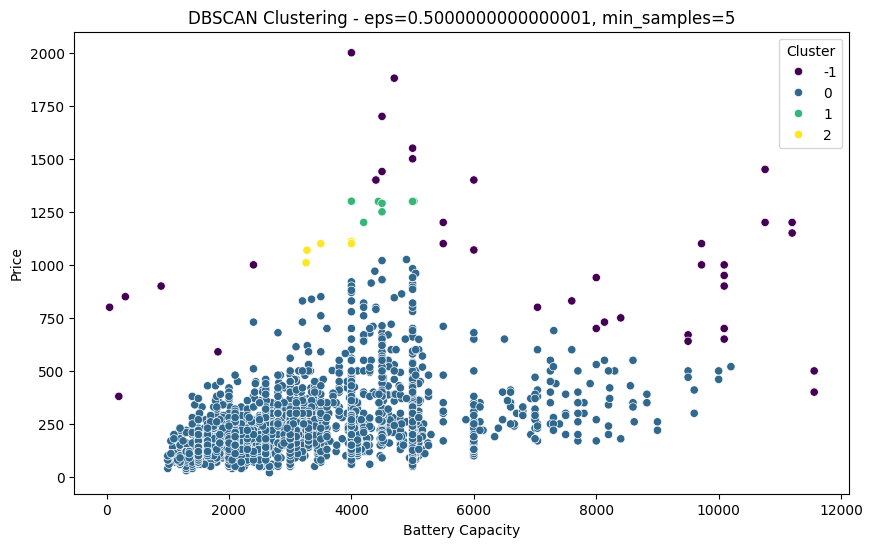

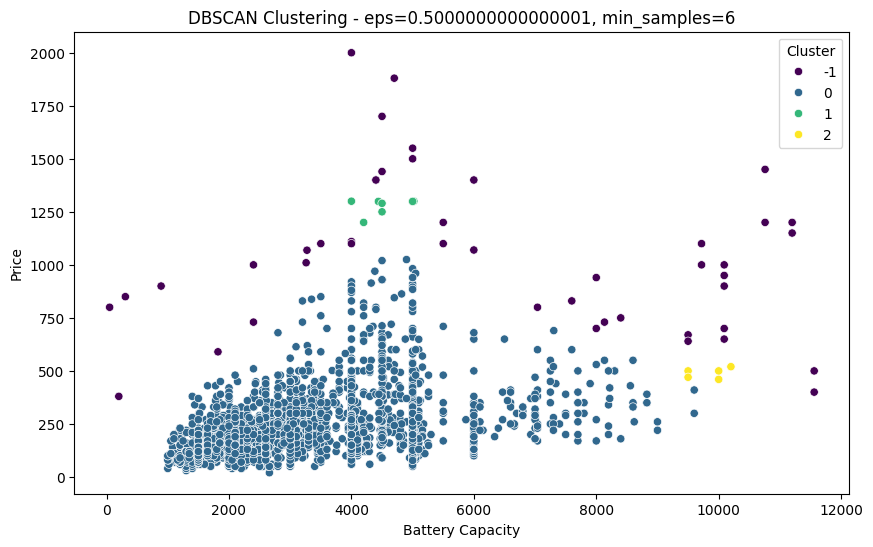

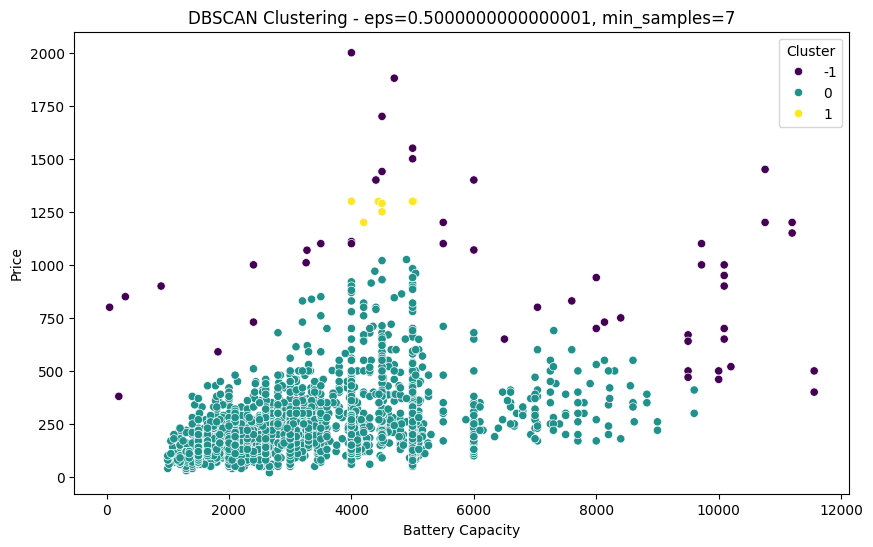

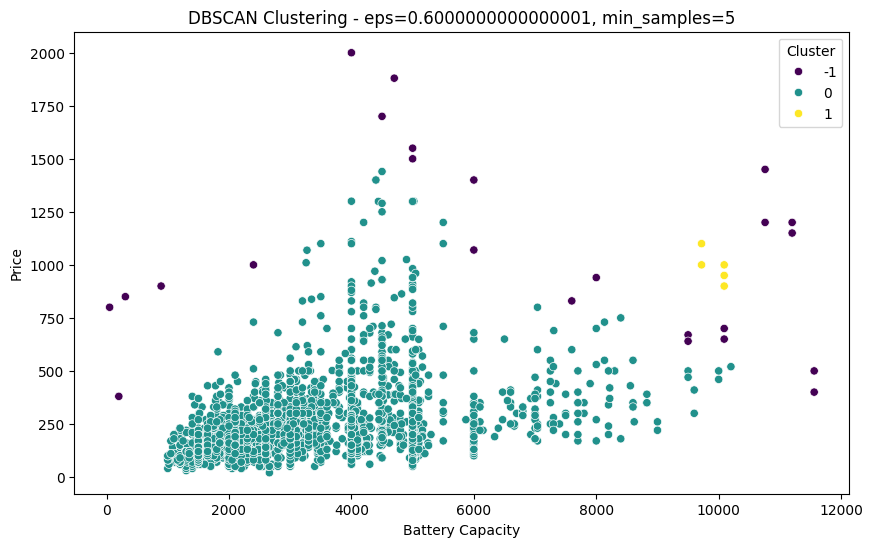

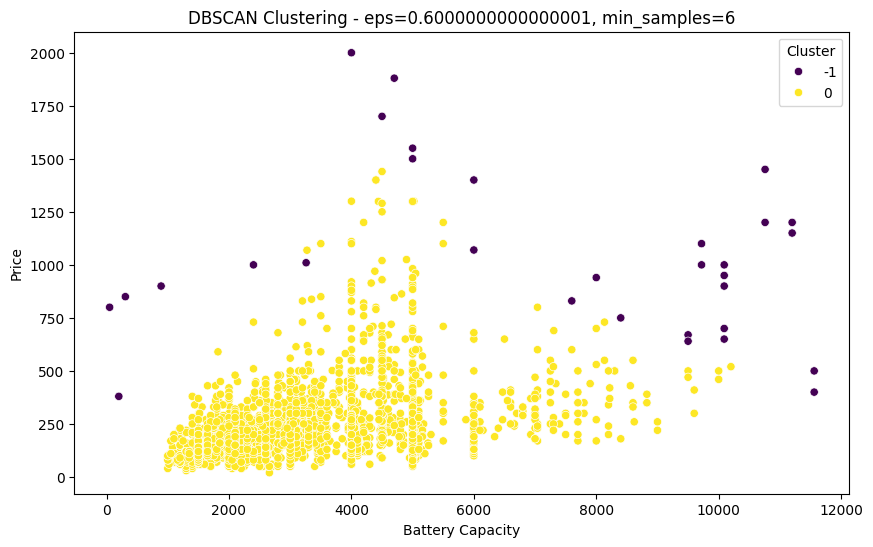

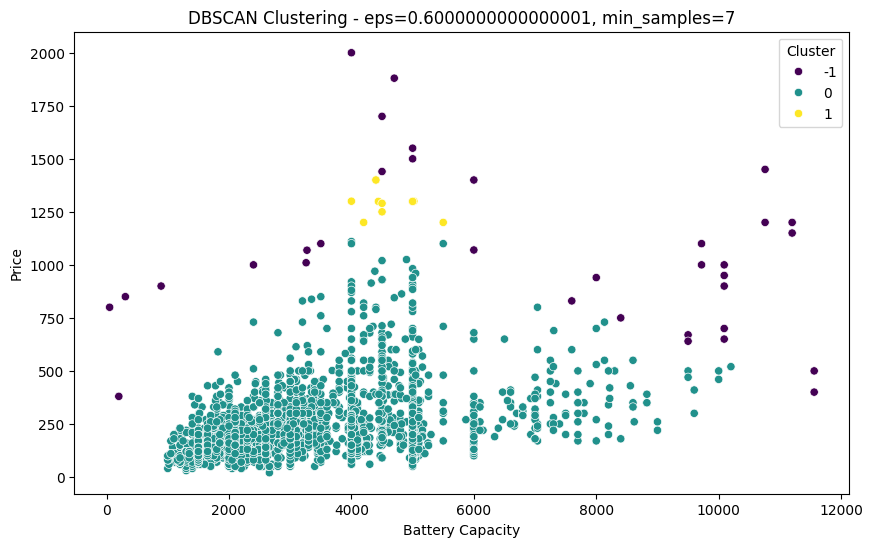

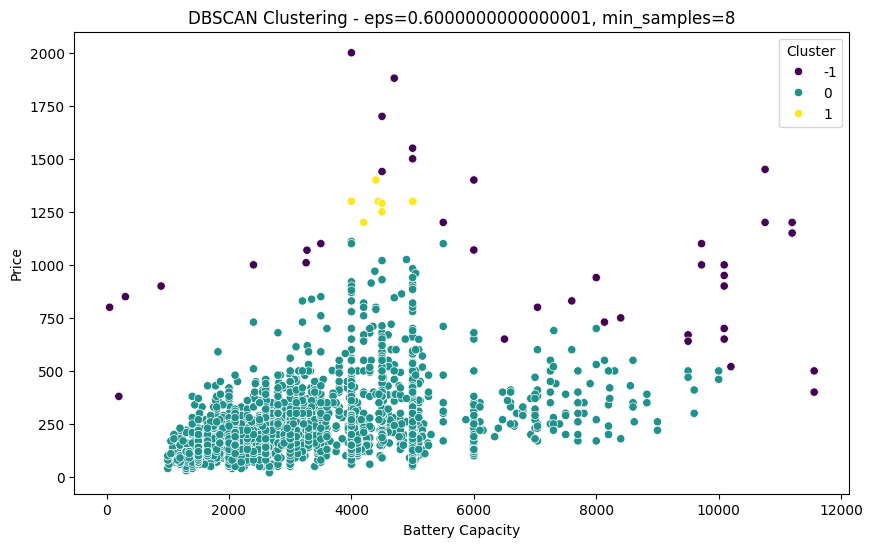

In [16]:
#DBSCAN Clustering
from sklearn.metrics import silhouette_score

battery_capacity = data.battery_capacity
Price = data.Price
data_3 = pd.DataFrame({'Battery Capacity': battery_capacity, 'Price': Price})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_3)
results = []
eps_values = list(np.arange(0.2, 0.7, 0.1))
min_samples_values = list(range(4, 9))
for eps_value in eps_values:
    for min_samples_value in min_samples_values:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        data_3['Cluster'] = dbscan.fit_predict(data_scaled)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Battery Capacity', y='Price', hue='Cluster', data=data_3, palette='viridis', legend='full')
        plt.title(f'DBSCAN Clustering - eps={eps_value}, min_samples={min_samples_value}')
        plt.xlabel('Battery Capacity')
        plt.ylabel('Price')
        plt.show()


DBSCAN(eps=0.255, min_samples=8)

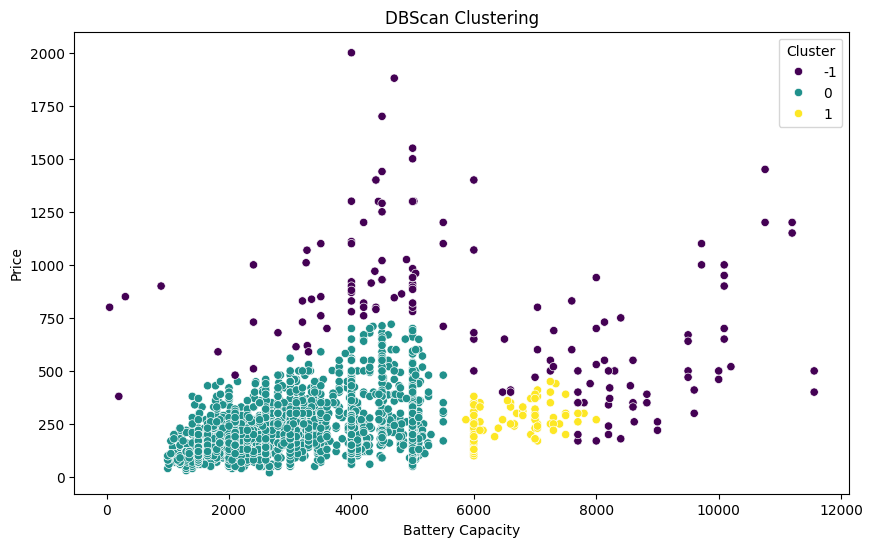

In [17]:
dbscan = DBSCAN(eps=0.255, min_samples=8)
data_3['Cluster'] = dbscan.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity', y='Price', hue='Cluster', data=data_3, palette='viridis', legend='full')
plt.title('DBScan Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()

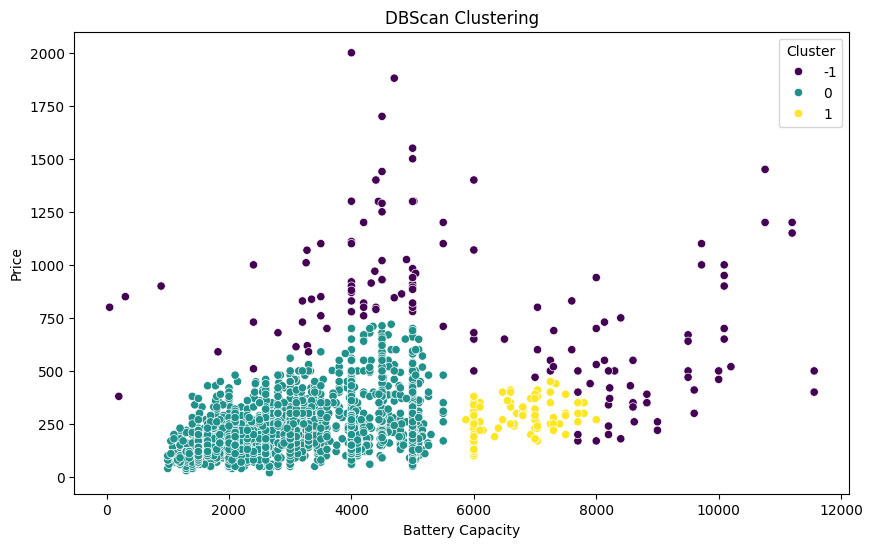

In [42]:
dbscan = DBSCAN(eps=0.26656, min_samples=8)
data_3['Cluster'] = dbscan.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity', y='Price', hue='Cluster', data=data_3, palette='viridis', legend='full')
plt.title('DBScan Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.26656, min_samples=8)
data_3['Cluster'] = dbscan.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity', y='Price', hue='Cluster', data=data_3, palette='viridis', legend='full')
plt.title('DBScan Clustering')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()